# Step — 1: Importing Libraries - Loading Dataset

In [2]:
#Script 1 — Importing all required libraries, modules and the TensorFlow Dataset (tfds).

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import array_to_img
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import random

In [3]:
#Script 2 — Loading the cats vs. dogs dataset

dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)


#Step — 2: Dataset Visualization

Using a visualization tool to see 7 images and their labels from the dataset "Cats vs. Dogs".

Image: (262, 350, 3)
Label: 1


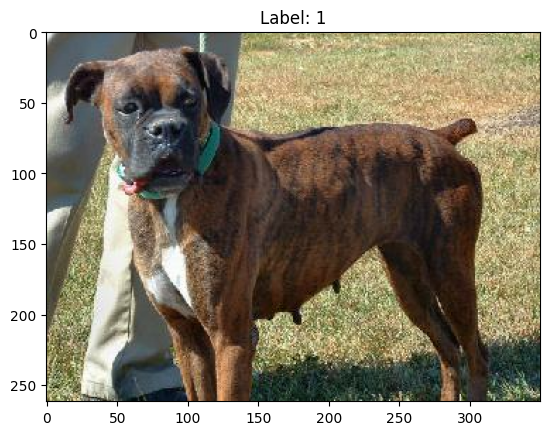

Image: (409, 336, 3)
Label: 1


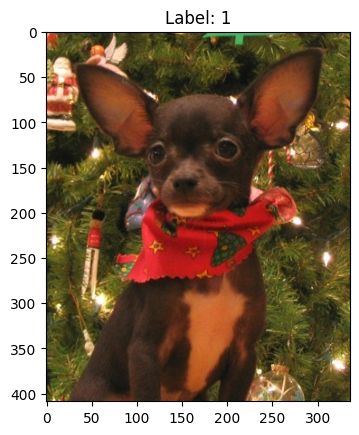

Image: (493, 500, 3)
Label: 1


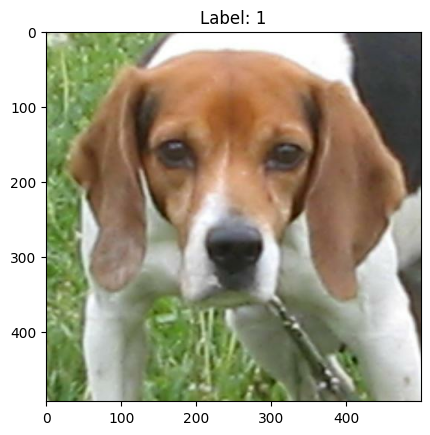

Image: (375, 500, 3)
Label: 0


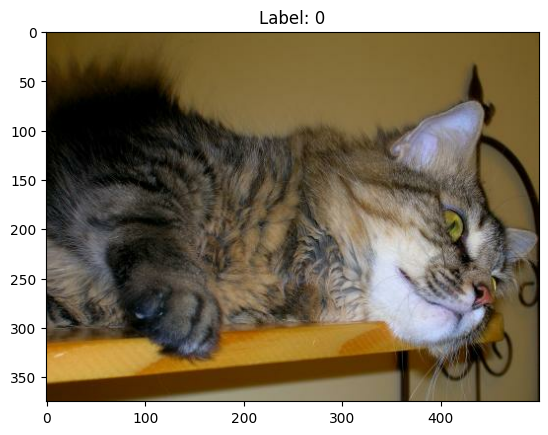

Image: (240, 320, 3)
Label: 1


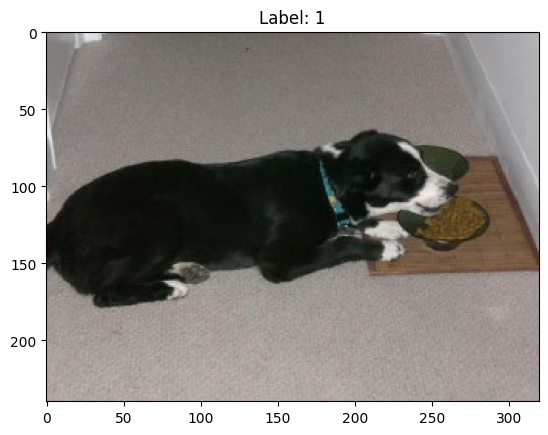

Image: (100, 100, 3)
Label: 1


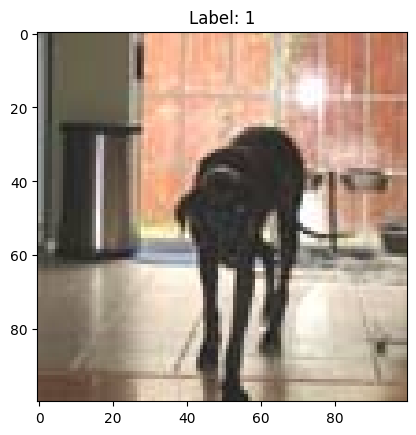

Image: (216, 182, 3)
Label: 0


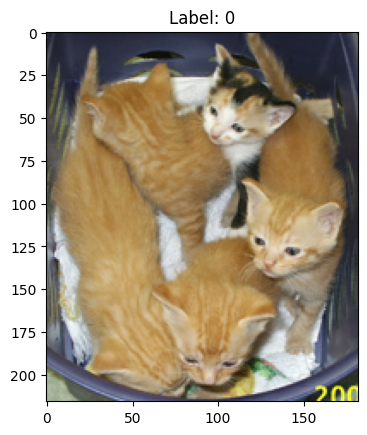

In [ ]:
#Script 3 — Using the iterator function/method to retrieve a small set of images (data) & display them with their corresponding labels.
#Please note: Cats are labeled as 0 while dogs are labeled as 1.
import numpy as np
import matplotlib.pyplot as plt

count = 0
for example in dataset.as_numpy_iterator():
    image = example['image']
    label = example['label']
    print(f"Image: {image.shape}")
    print(f"Label: {label}")

    # Displaying the image
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.show()

    count += 1
    if count == 7:
        break

#Salt & Pepper Noisy Image Augmentation

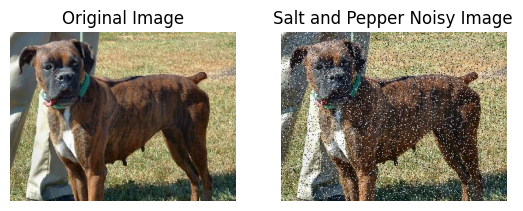

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the "cats_vs_dogs" dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

# Take one example from the dataset
example = dataset.take(1)

# Extract the image and label
for data in example:
    image_data, label = data['image'], data['label']

# Convert image to NumPy array
image_array = tf.image.convert_image_dtype(image_data, dtype=tf.uint8).numpy()

# Function to add Salt and Pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    salt_pixels = int(total_pixels * salt_prob)
    salt_coordinates = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    noisy_image[salt_coordinates[0], salt_coordinates[1], :] = 255

    # Add pepper noise
    pepper_pixels = int(total_pixels * pepper_prob)
    pepper_coordinates = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy_image[pepper_coordinates[0], pepper_coordinates[1], :] = 0

    return noisy_image

# Add Salt and Pepper noise to the image
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image_array, salt_prob=0.02, pepper_prob=0.02)

# Display the original and noisy images
plt.subplot(1, 2, 1), plt.imshow(image_array)
plt.title("Original Image"), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(salt_and_pepper_noisy_image)
plt.title("Salt and Pepper Noisy Image"), plt.axis("off")
plt.show()


#Blackbox to train the model on Salt & Pepper Noisy Image

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the "cats_vs_dogs" dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

# Take one example from the dataset
example = dataset.take(1)

# Extract the image and label
for data in example:
    image_data, label = data['image'], data['label']

# Convert image to NumPy array
image_array = tf.image.convert_image_dtype(image_data, dtype=tf.uint8).numpy()

# Function to add Salt and Pepper noise to an image
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Add salt noise
    salt_pixels = int(total_pixels * salt_prob)
    salt_coordinates = [np.random.randint(0, i - 1, salt_pixels) for i in image.shape]
    noisy_image[salt_coordinates[0], salt_coordinates[1], :] = 255

    # Add pepper noise
    pepper_pixels = int(total_pixels * pepper_prob)
    pepper_coordinates = [np.random.randint(0, i - 1, pepper_pixels) for i in image.shape]
    noisy_image[pepper_coordinates[0], pepper_coordinates[1], :] = 0

    return noisy_image

# Add Salt and Pepper noise to the image
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image_array, salt_prob=0.02, pepper_prob=0.02)

# Display the original and noisy images
plt.subplot(1, 2, 1), plt.imshow(image_array)
plt.title("Original Image"), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(salt_and_pepper_noisy_image)
plt.title("Salt and Pepper Noisy Image"), plt.axis("off")
plt.show()

# Preprocess the salt and pepper noisy image for training
salt_and_pepper_noisy_image = tf.image.resize(salt_and_pepper_noisy_image, (224, 224))
salt_and_pepper_noisy_image = tf.cast(salt_and_pepper_noisy_image, tf.float32) / 255.0

# Define the blackbox model architecture
model = tf.keras.Sequential([
    # Convolutional layers
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten the output and add fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model on the salt and pepper noisy image for 7 epochs
model.fit(tf.expand_dims(salt_and_pepper_noisy_image, axis=0), np.array([label]), epochs=7)


Epoch 1/7
1/1 [==============================] - 3s 3s/step - loss: 0.6583 - accuracy: 1.0000
Epoch 2/7
1/1 [==============================] - 0s 18ms/step - loss: 2.8165e-04 - accuracy: 1.0000
Epoch 3/7
1/1 [==============================] - 0s 18ms/step - loss: 9.0933e-10 - accuracy: 1.0000
Epoch 4/7
1/1 [==============================] - 0s 15ms/step - loss: 1.5053e-16 - accuracy: 1.0000
Epoch 5/7
1/1 [==============================] - 0s 15ms/step - loss: 2.4638e-24 - accuracy: 1.0000
Epoch 6/7
1/1 [==============================] - 0s 19ms/step - loss: 8.1939e-33 - accuracy: 1.0000
Epoch 7/7
1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000


# #Image Augmentation Techniques Visualized

In [ ]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented Image')
  plt.imshow(augmented)

# #2 — Flipping Images

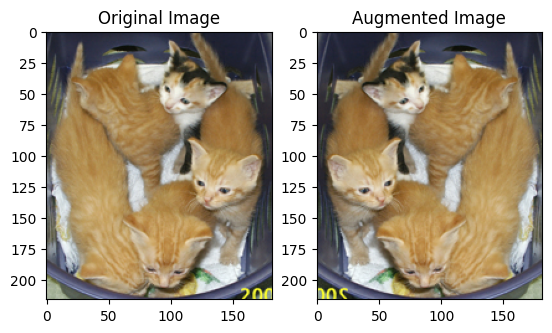

In [ ]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

# #3 — Image Grayscaling

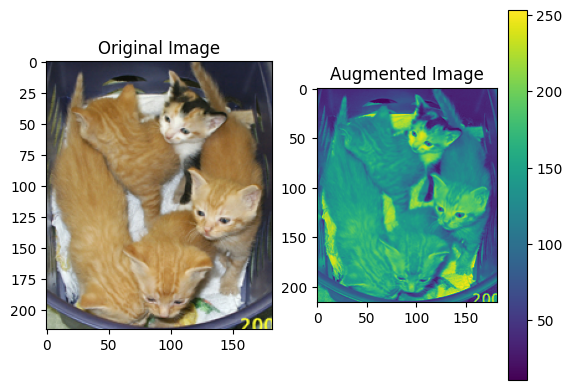

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

# #4 — Image Saturation

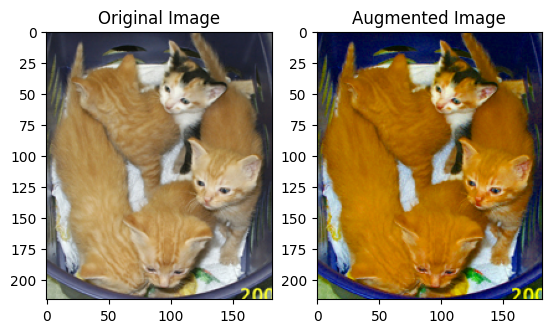

In [ ]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

# #5 — Adjusting Image Brightness

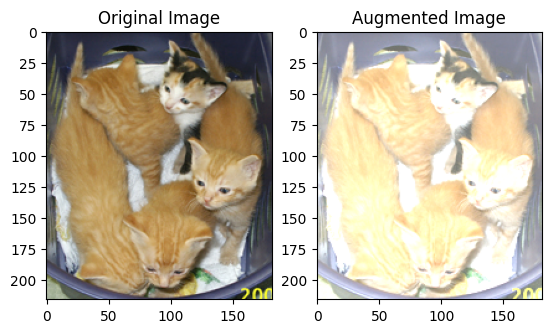

In [ ]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

# #6 — Image Cropping: Center crop an image

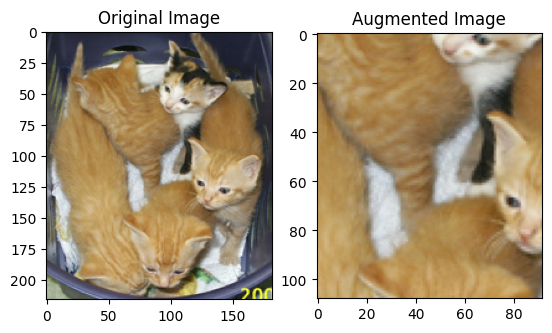

In [ ]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

# #7 — Image Rotation

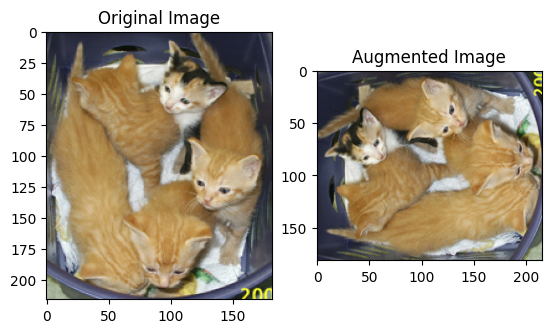

In [ ]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

#Blackbox — Resizing + Rescaling + Flipping + Grayscale + Saturation + Rotation

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

def preprocess_image(element):
    image = element["image"]
    label = element["label"]
    image = tf.image.resize(element['image'], (224, 224))  # Adjust size as needed
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(element['label'], tf.float32)
    flipped = tf.image.flip_left_right(image)
    grayscaled = tf.image.rgb_to_grayscale(image)
    saturated = tf.image.adjust_saturation(image, 3)
    rotated = tf.image.rot90(image)

    return image, label

import tensorflow as tf
from tensorflow.keras import layers, models

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
history = model.fit(dataset, epochs=7)  # You can specify the number of epochs you want to train for

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteGDLQ2T/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.
Epoch 1/7
727/727 [==============================] - 61s 65ms/step - loss: 0.6417 - accuracy: 0.6177
Epoch 2/7
727/727 [==============================] - 48s 67ms/step - loss: 0.4918 - accuracy: 0.7633
Epoch 3/7
727/727 [==============================] - 47s 64ms/step - loss: 0.3949 - accuracy: 0.8204
Epoch 4/7
727/727 [==============================] - 47s 64ms/step - loss: 0.3224 - accuracy: 0.8594
Epoch 5/7
727/727 [==============================] - 47s 65ms/step - loss: 0.2435 - accuracy: 0.8992
Epoch 6/7
727/727 [==============================] - 47s 64ms/step - loss: 0.1800 - accuracy: 0.9261
Epoch 7/7
727/727 [==============================] - 48s 66ms/step - loss: 0.1517 - accuracy: 0.9402


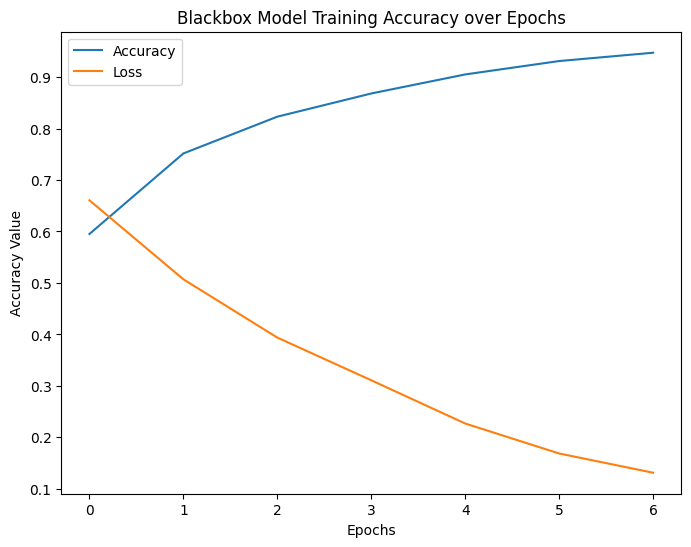

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 6]

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.title('Blackbox Model Training Accuracy over Epochs')
plt.legend()
plt.show()


#Blackbox — 3: Resizing + Rescaling + Flipping

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

def preprocess_image(element):
    image = element["image"]
    label = element["label"]
    image = tf.image.resize(element['image'], (224, 224))  # Adjust size as needed
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(element['label'], tf.float32)
    flipped = tf.image.flip_left_right(image)
    return image, label

import tensorflow as tf
from tensorflow.keras import layers, models

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
history = model.fit(dataset, epochs=7)  # You can specify the number of epochs you want to train for

Epoch 1/7
727/727 [==============================] - 47s 62ms/step - loss: 0.6404 - accuracy: 0.6145
Epoch 2/7
727/727 [==============================] - 43s 59ms/step - loss: 0.4562 - accuracy: 0.7840
Epoch 3/7
727/727 [==============================] - 43s 59ms/step - loss: 0.3491 - accuracy: 0.8473
Epoch 4/7
727/727 [==============================] - 43s 59ms/step - loss: 0.2649 - accuracy: 0.8874
Epoch 5/7
727/727 [==============================] - 43s 59ms/step - loss: 0.1929 - accuracy: 0.9221
Epoch 6/7
727/727 [==============================] - 49s 68ms/step - loss: 0.1490 - accuracy: 0.9401
Epoch 7/7
727/727 [==============================] - 44s 60ms/step - loss: 0.1083 - accuracy: 0.9605


#Resize + Rescale + Grayscale

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

def preprocess_image(element):
    image = element["image"]
    label = element["label"]
    image = tf.image.resize(element['image'], (224, 224))  # Adjust size as needed
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(element['label'], tf.float32)
    grayscaled = tf.image.rgb_to_grayscale(image)
    return image, label

import tensorflow as tf
from tensorflow.keras import layers, models

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
history = model.fit(dataset, epochs=7)  # You can specify the number of epochs you want to train for

Epoch 1/7
727/727 [==============================] - 44s 58ms/step - loss: 0.6200 - accuracy: 0.6456
Epoch 2/7
727/727 [==============================] - 43s 59ms/step - loss: 0.4507 - accuracy: 0.7872
Epoch 3/7
727/727 [==============================] - 43s 59ms/step - loss: 0.3558 - accuracy: 0.8424
Epoch 4/7
727/727 [==============================] - 42s 58ms/step - loss: 0.2780 - accuracy: 0.8814
Epoch 5/7
727/727 [==============================] - 41s 56ms/step - loss: 0.2035 - accuracy: 0.9157
Epoch 6/7
727/727 [==============================] - 41s 56ms/step - loss: 0.1477 - accuracy: 0.9410
Epoch 7/7
727/727 [==============================] - 42s 57ms/step - loss: 0.1172 - accuracy: 0.9545


#Checking Blackbox accuracy score after Image Cropping

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models

# Load the dataset
dataset_name = "cats_vs_dogs"
(train_dataset, test_dataset), info = tfds.load(name=dataset_name, split=['train[:80%]', 'train[80%:]'], with_info=True)

def preprocess_image(element):
    image = tf.image.resize(element['image'], (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(element['label'], tf.float32)
    cropped = tf.image.central_crop(image, central_fraction=0.5)
    return image, label

# Apply preprocessing to the dataset
batch_size = 32
preprocessed_dataset = train_dataset.map(preprocess_image)
preprocessed_dataset = preprocessed_dataset.batch(batch_size)

def create_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flatten the output and add fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create an instance of the model
model = create_model()

# Train the model
history = model.fit(preprocessed_dataset, epochs=7)


Epoch 1/7
582/582 [==============================] - 37s 60ms/step - loss: 0.6374 - accuracy: 0.6221
Epoch 2/7
582/582 [==============================] - 33s 57ms/step - loss: 0.5116 - accuracy: 0.7482
Epoch 3/7
582/582 [==============================] - 34s 58ms/step - loss: 0.4237 - accuracy: 0.8061
Epoch 4/7
582/582 [==============================] - 35s 60ms/step - loss: 0.3509 - accuracy: 0.8462
Epoch 5/7
582/582 [==============================] - 35s 59ms/step - loss: 0.2829 - accuracy: 0.8797
Epoch 6/7
582/582 [==============================] - 35s 60ms/step - loss: 0.2218 - accuracy: 0.9102
Epoch 7/7
582/582 [==============================] - 34s 58ms/step - loss: 0.1800 - accuracy: 0.9263


#Creating a Binary Image

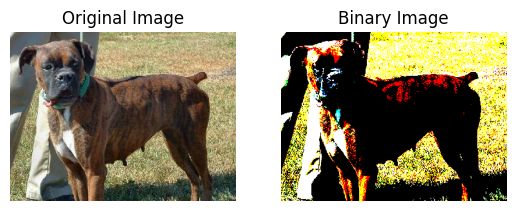

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dataset_name = "cats_vs_dogs" # Load the "cats_vs_dogs" dataset
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

example = dataset.take(1) # Take one example from the dataset

for data in example: # Extract the image and label
    image_data, label = data['image'], data['label']

image_array = image.img_to_array(image_data) # Convert image to NumPy array

# Perform thresholding using TensorFlow
threshold = 128
binary_image = tf.where(image_array > threshold, 255.0, 0.0)

# Display the original and binary images
plt.subplot(1, 2, 1), plt.imshow(image_array.astype('uint8'))
plt.title('Original Image'), plt.axis('off')

plt.subplot(1, 2, 2), plt.imshow(binary_image.numpy().astype('uint8'))
plt.title('Binary Image'), plt.axis('off')

plt.show()

# Checking blackbox accuracy after creating a binary image

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

# Define a function to preprocess images
def preprocess_image(element):
    image = tf.image.resize(element['image'], [224, 224])  # Resize images to a consistent size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    label = tf.cast(element['label'], tf.float32)  # Cast labels to float32
    return image, label

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

# Split the dataset into training and testing sets
train_size = int(0.8 * info.splits['train'].num_examples)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Epoch 1/5
727/727 [==============================] - 46s 61ms/step - loss: 0.6360 - accuracy: 0.6594
Epoch 2/5
727/727 [==============================] - 48s 66ms/step - loss: 0.4858 - accuracy: 0.7622
Epoch 3/5
727/727 [==============================] - 50s 68ms/step - loss: 0.3854 - accuracy: 0.8246
Epoch 4/5
727/727 [==============================] - 45s 62ms/step - loss: 0.2630 - accuracy: 0.8876
Epoch 5/5
727/727 [==============================] - 46s 64ms/step - loss: 0.1598 - accuracy: 0.9362


ValueError: ignored

#Morphological Analysis --- Dilation

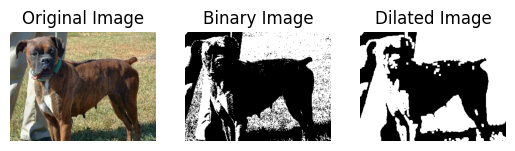

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

dataset_name = "cats_vs_dogs" # Load the "cats_vs_dogs" dataset
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

example = dataset.take(1) # Take one example from the dataset

for data in example: # Extract the image and label
    image_data, label = data['image'], data['label']

image_array = image.img_to_array(image_data) # Convert image to NumPy array
gray_image = cv2.cvtColor(image_array.astype('uint8'), cv2.COLOR_RGB2GRAY) # Convert to grayscale

threshold = 128 # Perform thresholding using TensorFlow
_, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)) # Define a kernel for dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1) # Perform dilation using OpenCV

# Display the original, binary, and dilated images
plt.subplot(1, 3, 1)
plt.imshow(image_array.astype('uint8'))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

plt.show()

# Checking blackbox accuracy after Dilation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

# Define a function to preprocess images with dilation
def preprocess_image(element):
    image = tf.image.resize(element['image'], [224, 224])  # Resize images to a consistent size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]

    # Apply dilation
    image = tf.py_function(func=dilate_image, inp=[image], Tout=tf.float32)

    label = tf.cast(element['label'], tf.float32)  # Cast labels to float32
    return image, label

# Define a function for image dilation
def dilate_image(image):
    kernel = np.ones((5, 5), np.uint8)
    dilated_image = cv2.dilate(image.numpy(), kernel, iterations=1)
    return dilated_image

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

# Split the dataset into training and testing sets
train_size = int(0.8 * info.splits['train'].num_examples)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=7)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Epoch 1/7
727/727 [==============================] - 45s 58ms/step - loss: 0.6428 - accuracy: 0.6217
Epoch 2/7
727/727 [==============================] - 43s 59ms/step - loss: 0.4785 - accuracy: 0.7692
Epoch 3/7
727/727 [==============================] - 43s 59ms/step - loss: 0.3669 - accuracy: 0.8369
Epoch 4/7
727/727 [==============================] - 43s 59ms/step - loss: 0.2882 - accuracy: 0.8770
Epoch 5/7
727/727 [==============================] - 43s 59ms/step - loss: 0.2131 - accuracy: 0.9117
Epoch 6/7
727/727 [==============================] - 42s 58ms/step - loss: 0.1552 - accuracy: 0.9371
Epoch 7/7
727/727 [==============================] - 42s 57ms/step - loss: 0.1254 - accuracy: 0.9503


#Erosion

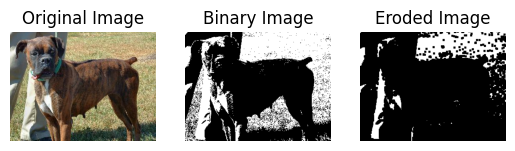

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

# Load the "cats_vs_dogs" dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

example = dataset.take(1) # Take one example from the dataset

for data in example: # Extract the image and label
    image_data, label = data['image'], data['label']

image_array = image.img_to_array(image_data) # Convert image to NumPy array
gray_image = cv2.cvtColor(image_array.astype('uint8'), cv2.COLOR_RGB2GRAY) # Convert to grayscale

threshold = 128 # Perform thresholding using TensorFlow
_, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

# Perform erosion using OpenCV
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))  # Define a kernel for erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Display the original, binary, and eroded images
plt.subplot(1, 3, 1), plt.imshow(image_array.astype('uint8'))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2), plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(1, 3, 3), plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.show()


# Training & Testing Blackbox Accuracy after Erosion

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the dataset
dataset_name = "cats_vs_dogs"
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

# Define a function to preprocess images with erosion
def preprocess_image(element):
    image = tf.image.resize(element['image'], [224, 224])  # Resize images to a consistent size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]

    # Apply erosion
    image = tf.py_function(func=erode_image, inp=[image], Tout=tf.float32)

    label = tf.cast(element['label'], tf.float32)  # Cast labels to float32
    return image, label

# Define a function for image erosion
def erode_image(image):
    kernel = np.ones((5, 5), np.uint8)
    eroded_image = cv2.erode(image.numpy(), kernel, iterations=1)
    return eroded_image

# Apply preprocessing to the dataset
batch_size = 32
dataset = dataset.map(preprocess_image)
dataset = dataset.batch(batch_size)

# Split the dataset into training and testing sets
train_size = int(0.8 * info.splits['train'].num_examples)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=5)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Epoch 1/7
727/727 [==============================] - 44s 58ms/step - loss: 0.6163 - accuracy: 0.6500
Epoch 2/7
727/727 [==============================] - 42s 58ms/step - loss: 0.4573 - accuracy: 0.7834
Epoch 3/7
727/727 [==============================] - 42s 58ms/step - loss: 0.3655 - accuracy: 0.8365
Epoch 4/7
727/727 [==============================] - 42s 58ms/step - loss: 0.2890 - accuracy: 0.8740
Epoch 5/7
727/727 [==============================] - 42s 58ms/step - loss: 0.2030 - accuracy: 0.9168
Epoch 6/7
727/727 [==============================] - 43s 59ms/step - loss: 0.1505 - accuracy: 0.9411
Epoch 7/7
727/727 [==============================] - 42s 57ms/step - loss: 0.1120 - accuracy: 0.9587


#Edge Detection

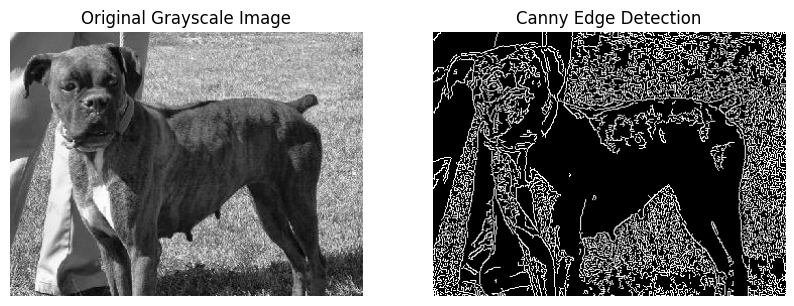

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

dataset_name = "cats_vs_dogs" # Load the "cats_vs_dogs" dataset
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

example = dataset.take(1) # Take one example from the dataset

for data in example: # Extract the image and label
    image_data, label = data['image'], data['label']

image_array = image.img_to_array(image_data) # Convert image to NumPy array
gray_image = cv2.cvtColor(image_array.astype('uint8'), cv2.COLOR_RGB2GRAY) # Convert to grayscale

edges = cv2.Canny(gray_image, threshold1=100, threshold2=200) # Apply Canny Edge Detection

plt.figure(figsize=(10, 5)) # Show the original and edge-detected images side by side

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

In [5]:
from tabulate import tabulate

# Define the data
data = [
    ["Original Data", 0.6197, 0.7488, 0.8105, 0.8504, 0.8844, 0.9148, 0.9350],
    ["Resizing + Rescaling", 0.6240, 0.7641, 0.8170, 0.8608, 0.9018, 0.9323, 0.9538],
    ["Resizing + Rescaling + Flipping", 0.6145, 0.7840, 0.8473, 0.8874, 0.9221, 0.9401, 0.9605],
    ["Resizing + Rescaling + Flipping + Grayscale + Saturation + Rotation", 0.6177, 0.7633, 0.8204, 0.8594, 0.8992, 0.9261, 0.9402],
    ["Salt & Pepper Noisy Image", 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000],
    ["Resize + Rescale + Grayscale", 0.6456, 0.7872, 0.8424, 0.8814, 0.9157, 0.9410, 0.9545],
    ["Image Cropping", 0.6221, 0.7482, 0.8061, 0.8462, 0.8797, 0.9102, 0.9263]
]

# Define the headers
headers = ["", "Epoch1", "Epoch2", "Epoch3", "Epoch4", "Epoch5", "Epoch6", "Epoch7"]

# Print the table
table = tabulate(data, headers, tablefmt="grid")
print(table)


+---------------------------------------------------------------------+----------+----------+----------+----------+----------+----------+----------+
|                                                                     |   Epoch1 |   Epoch2 |   Epoch3 |   Epoch4 |   Epoch5 |   Epoch6 |   Epoch7 |
+=====================================================================+==========+==========+==========+==========+==========+==========+==========+
| Original Data                                                       |   0.6197 |   0.7488 |   0.8105 |   0.8504 |   0.8844 |   0.9148 |   0.935  |
+---------------------------------------------------------------------+----------+----------+----------+----------+----------+----------+----------+
| Resizing + Rescaling                                                |   0.624  |   0.7641 |   0.817  |   0.8608 |   0.9018 |   0.9323 |   0.9538 |
+---------------------------------------------------------------------+----------+----------+----------+--

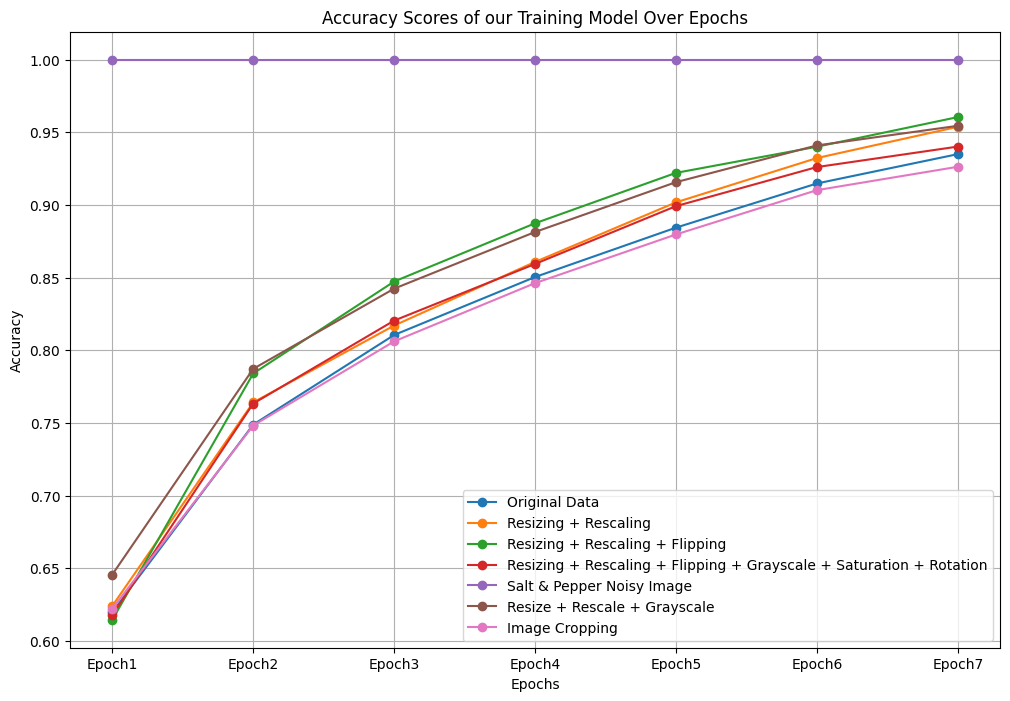

In [7]:
import matplotlib.pyplot as plt

epochs = [f'Epoch{i}' for i in range(1, 8)]

accuracy_original_data = [0.6197, 0.7488, 0.8105, 0.8504, 0.8844, 0.9148, 0.9350]
accuracy_resizing_rescaling = [0.6240, 0.7641, 0.8170, 0.8608, 0.9018, 0.9323, 0.9538]
accuracy_resizing_rescaling_flipping = [0.6145, 0.7840, 0.8473, 0.8874, 0.9221, 0.9401, 0.9605]
accuracy_augmentation_combo = [0.6177, 0.7633, 0.8204, 0.8594, 0.8992, 0.9261, 0.9402]
accuracy_salt_pepper_noisy = [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]
accuracy_resize_rescale_grayscale = [0.6456, 0.7872, 0.8424, 0.8814, 0.9157, 0.9410, 0.9545]
accuracy_image_cropping = [0.6221, 0.7482, 0.8061, 0.8462, 0.8797, 0.9102, 0.9263]

plt.figure(figsize=(12, 8))

plt.plot(epochs, accuracy_original_data, marker='o', label='Original Data')
plt.plot(epochs, accuracy_resizing_rescaling, marker='o', label='Resizing + Rescaling')
plt.plot(epochs, accuracy_resizing_rescaling_flipping, marker='o', label='Resizing + Rescaling + Flipping')
plt.plot(epochs, accuracy_augmentation_combo, marker='o', label='Resizing + Rescaling + Flipping + Grayscale + Saturation + Rotation')
plt.plot(epochs, accuracy_salt_pepper_noisy, marker='o', label='Salt & Pepper Noisy Image')
plt.plot(epochs, accuracy_resize_rescale_grayscale, marker='o', label='Resize + Rescale + Grayscale')
plt.plot(epochs, accuracy_image_cropping, marker='o', label='Image Cropping')

plt.title('Accuracy Scores of our Training Model Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
